<img src="../media/banner.png" width=600 height=350>
<table style="border:solid white;" cellspacing="0" cellpadding="0" border-collapse: collapse; border-spacing: 0;>
  <tr>
    <th style="background-color:white"> <img src="../media/logo_0.png" width=200 height=200></th>
    <th style="background-color:white"> <img src="../media/logo_1.png" width=200 height=200></th>
    <th style="background-color:white"> <img src="../media/logo_2.png" width=200 height=200></th>
  </tr>
</table>

<table style="border:solid white;" cellspacing="0" cellpadding="0" border-collapse: collapse; border-spacing: 1;>
  <tr>
    <th style="background-color:white"> <img src="../media/logo_3.png" width=200 height=200></th>
    <th style="background-color:white"> <img src="../media/logo_4.png" width=200 height=200></th>
  </tr>
</table>

<hr style="border: none; border-top: 3px solid #db0606;">
<h1 align="center">DiSCovERing innovative therapies for rare tumors: Overview</h1> 
<h3 align="cnter"> </h3>

__Authors:__ 
Allison Rose Hanaford - *Johns Hopkins University School of Medicine, Baltimore, MD*      
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Tenley C. Archer - *Boston Children's Hospital, Boston, MA*              
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Antoinette Price - *Johns Hopkins University School of Medicine, Baltimore, MD*                                                                             
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Ulf Kahlert - *University Medical Center Düsseldorf, Dusseldorf, Germany*                                                                                   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Jarek Maciaczyk - *University Medical Center Düsseldorf, Dusseldorf, Germany*                                                                             
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Nikkhah Guido - *Universitätsklinikum Freiburg, Freiburg, Germany*                                                                                
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Wlliam Kim - *Broad Institute of MIT and Harvard, Cambridge, MA*                              
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Tobias Ehrenberger - *Dana-Farber Cancer Institute, Boston, Massachusetts.*                                                                                                
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Paul Clemons - *Broad Institute of MIT and Harvard, Cambridge, MA*                            
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Vlado Dancik - *Broad Institute of MIT and Harvard, Cambridge, MA*                            
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Brinton Seashore-Ludlow - *Karolinska Institute, Stockholm, Sweden*                           
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Vasanthi Viswanathan - *Broad Institute of MIT and Harvard, Cambridge, MA*                    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Michelle Stewart - *Broad Institute of MIT and Harvard, Cambridge, MA*                        
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Matthew Rees - *Broad Institute of MIT and Harvard, Cambridge, MA*                            
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Alykahn Shamji - *Broad Institute of MIT and Harvard, Cambridge, MA*                          
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
William Hahn - *Broad Institute of MIT and Harvard, Cambridge, MA*                            
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Stuart Schreiber - *Broad Institute of MIT and Harvard, Cambridge, MA*                        
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Ernest Fraenkel - *MIT, Cambridge, MA*                                                        
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Scott Pomeroy - *Boston Children's Hospital, Boston, MA*                                      
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Jill Mesirov - *University of California San Diego, San Diego, CA*                             
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Pablo Tamayo - *University of California San Diego, San Diego, CA*                             
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Charles G. Eberhart - *Johns Hopkins University School of Medicine, Baltimore, MD*             
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Eric H. Raabe - *Johns Hopkins University School of Medicine, Baltimore, MD*

__Date:__ 15 July 2016

__Article:__ [DiSCoVERing innovative therapies for rare tumors: Combining genetically accurate disease models with advanced in silico analysis to identify novel therapeutic targets](http://clincancerres.aacrjournals.org/content/22/15/3903)


__Absract:__   
The lack of genetically accurate models that recapitulate the genetics of human tumors hampers the development of new treatments for rare tumor types. One strategy to create an accurate model would be to use stem cells from a cancer's tissue of origin and add key oncogenic driver elements in combinations that are seen in tumors. These elements should also drive oncogenic transformation relevant to that particular tumor type. To validate this strategy, we used human neural stem and progenitor cells derived from the cerebellar anlage to develop a model of Group 3 MYC-driven medulloblastoma, a rare and frequently fatal pediatric brain tumor. The cells were transduced with c-MYC, dominant-negative p53, constitutively active AKT and hTERT, key oncogenic driver elements associated with aggressive medulloblastoma and injected into moice as orthotopic xerographs. These cells formed tumors in the brains of mice and resulted in decreased survival to a median of 117 days. These tumors histologically, pathologically, and genetically resembled the MYC-driven Group 3 medulloblastoma tumors. In contrast, human neural stem cells immortalized with SV40 did not form tumors in mice. To facilitate rapid screening of a large number of available drugs, we developed an in silico analysis technique, DiSCoVER (Disease-model Signature vs. Compound-Variety Enriched Response) that uses the expression profile of the human neural stem cell models and existing drug sensitivity databases to identify novel therapeutic targets. The DiSCoVER analysis predicted aggressive medulloblastoma would be sensitive to CDK inhibitors. Among the top hits were the CDK4/6 inhibitor palbociclib. Indeed, treatment of Palbociclib in human neural stem cell medulloblastoma model and high-serum medulloblastoma cell lines led to decreased proliferation by an average of 62% as measured by MTS assay compared to vehicle control (p<0.01). Palbociclib treatment also increased the percentage of apoptotic cells by an average of 150% as measured by cleaved caspase-3 immunofluorescence and cleaved-PARP western blot compared to vehicle control (p< 0.04). Treatment with palbociclib significantly extended the survival of mice with orthotopic medulloblastoma xenografts (p = 0.003). We validated our human neural stem cell model of Group 3 medulloblastoma and show that this model, as well as patient-derived high MYC medulloblastoma models, are sensitive to CDK4/6 inhibition in vitro and in vivo. Our results strongly suggest that Palbociclib can be an effective treatment for poor-prognosis MYC-driven medulloblastomas in carefully selected patients (Group 3/C1). In summary, we have presented here a new method of generating genetically accurate models for rare tumors using region-specific human stem and progenitor cells and a novel analysis technique to find therapeutics to target them.

<img src="../media/supplementary_fig_1.png" width=800 height=800>


<hr style="border: none; border-bottom: 3px solid #db0606;">
## 1. Set up notebook and import Computational Cancer Analysis Library ([CCAL](https://github.com/KwatME/ccal))

In [1]:
from environment import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

Launching NB Project ...
	Exported variable DIR_PROJECT (/Users/kateme/comp_bio/discover_v1).
	Exported variable DIR_TOOLS (/Users/kateme/comp_bio/discover_v1/tools/).
	Exported variable DIR_DATA (/Users/kateme/comp_bio/discover_v1/data/).
	Exported variable DIR_RESULT (/Users/kateme/comp_bio/discover_v1/results/).
	Exported variable DIR_MEDIA (/Users/kateme/comp_bio/discover_v1/media/).


<hr style="border: none; border-top: 3px solid #db0606;">
## 2. Set input and result files/directories
These are the files where the input expression data and the output signature files are stored
### 2.1 Set data filepaths
Here the filepaths to the signature files are set.

In [2]:
ccle_signatures_file = join(DIR_DATA, 'CCLE_Expression_Entrez_2012-04-06_plus_Achilles.SELECTED_TISSUES_PATHWAYS.gct')
sanger_signatures_file = join(DIR_DATA, 'Sanger_Expression.out.SELECTED_TISSUES_PATHWAYS.gct')

Here the filepaths to the drug sensitivity files are set.

In [3]:
ccle_drug_file = join(DIR_DATA, 'CCLE_Drug_Sensitivity.gct')
ctrp_drug_file = join(DIR_DATA, 'CTRPv2.2_2015_pub.gct')
sanger_drug_file = join(DIR_DATA, 'drug_sensitivity.out.SELECTED.gct')

<hr style="border: none; border-bottom: 1px solid #db0606;">
### 2.2 Load data files

Here the signature data is loaded and the hNSC signatures with 150 of the most up-regulated genes are selected from the signature data.

In [4]:
ccle_signatures = ccal.read_gct(ccle_signatures_file)
ccle_hNSC_G3_150_UP = ccle_signatures.ix['hNSC_G3_150_UP']
sanger_signatures = ccal.read_gct(sanger_signatures_file)
sanger_hNSC_G3_150_UP = sanger_signatures.ix['hNSC_G3_150_UP']

Here the drug sensitivity data is loaded.

In [5]:
ccle_drug_sensitivity = ccal.read_gct(ccle_drug_file)
ctrp_drug_sensitivity = ccal.read_gct(ctrp_drug_file)
sanger_drug_sensitivity = ccal.read_gct(sanger_drug_file)

<hr style="border: none; border-top: 3px solid #db0606;">
## 3. Compare medulloblastoma expressional signatures to drug sensitivity data 
The three comparisons noted in supplementary figure 1, shown above, are performed below.
### 3.1 Compare Sanger hNSC signature to Sanger drug sensitivity
Below an association panel of the top drugs most and least associated with the hNSC signature are shown.

In [6]:
sanger_sanger_results = join(DIR_RESULT, 'sanger_sig_sanger_drug')

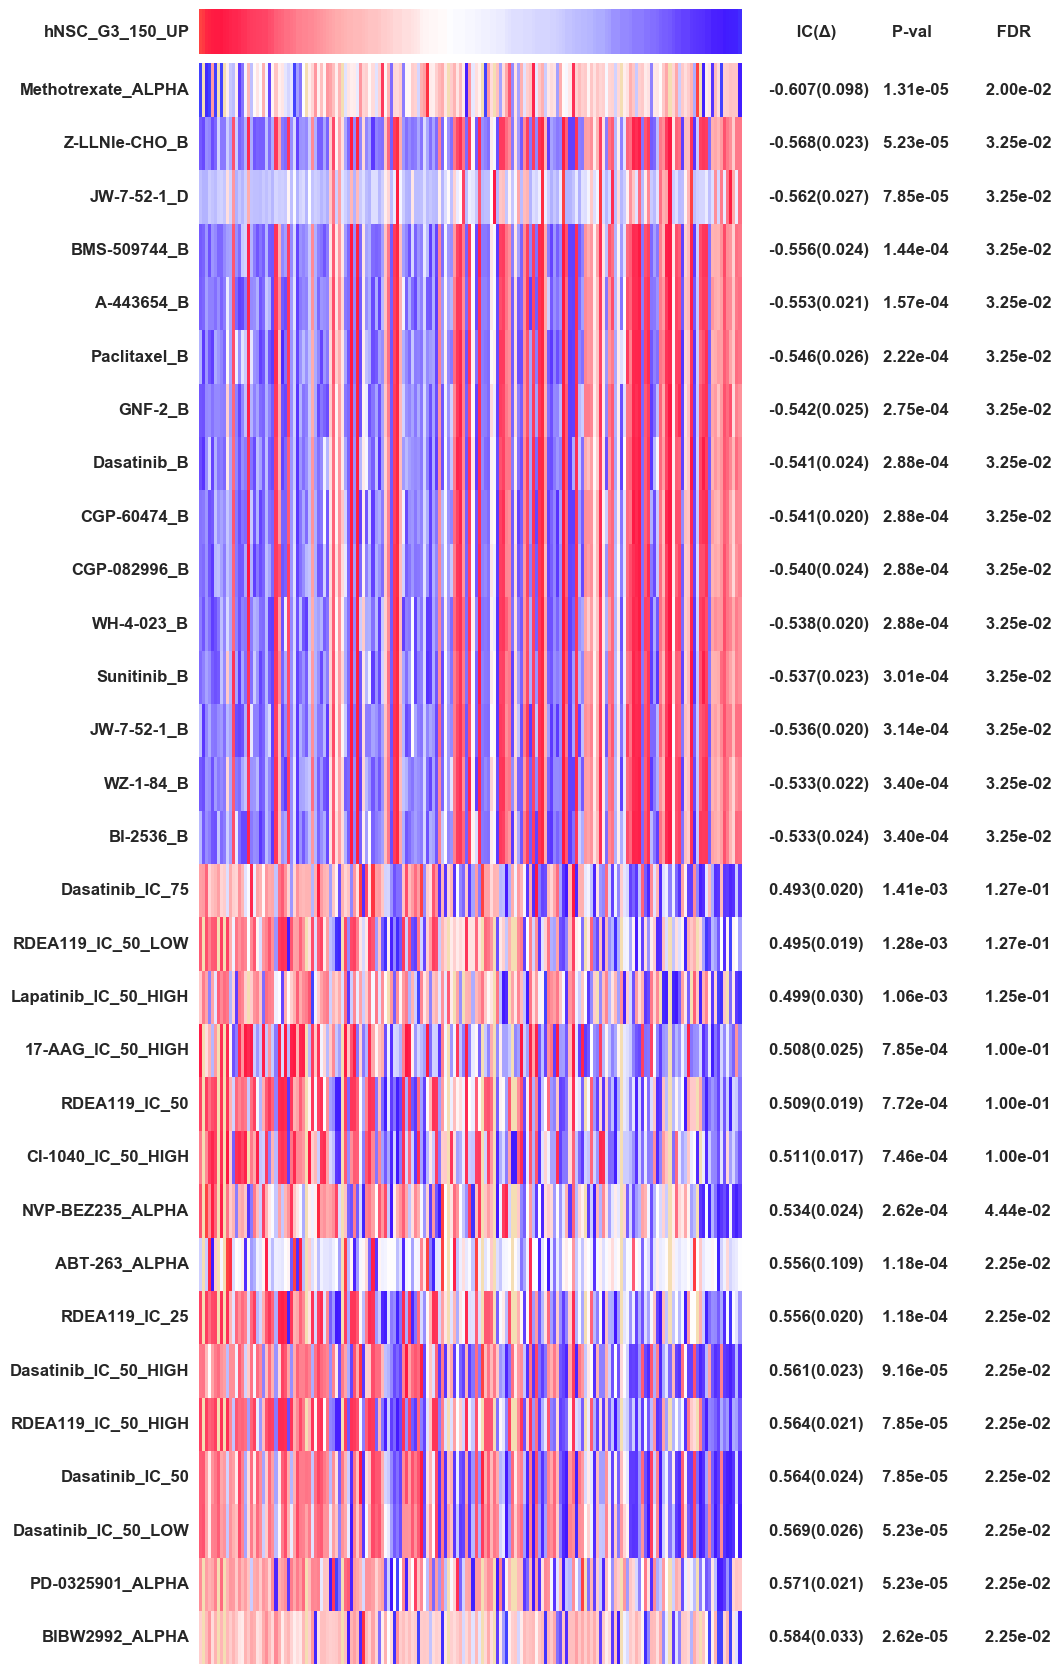

In [7]:
# Make Association Panel
sanger_sign_sanger_drug = ccal.association.make_association_panel(
                        sanger_hNSC_G3_150_UP,
                        sanger_drug_sensitivity,
                        n_permutations=50,
                        max_n_features=30,
                        features_ascending=True,
                        n_jobs=1,
                        n_features=.90,
                        filepath_prefix=sanger_sanger_results)

Here the drugs CGP-60474_B and CGP-082996_B are selectively compared to the hNSC signature.

In [8]:
indices = ['CGP-082996_B','CGP-60474_B']

Launching NB Project ...
	Exported variable DIR_PROJECT (/Users/kateme/comp_bio/discover_v1).
	Exported variable DIR_TOOLS (/Users/kateme/comp_bio/discover_v1/tools/).
	Exported variable DIR_DATA (/Users/kateme/comp_bio/discover_v1/data/).
	Exported variable DIR_RESULT (/Users/kateme/comp_bio/discover_v1/results/).
	Exported variable DIR_MEDIA (/Users/kateme/comp_bio/discover_v1/media/).


In [9]:
results = join(DIR_RESULT, 'CGP-60474_CGP-082996_panel')

In [10]:
sanger_drug_sensitivity_selected = sanger_drug_sensitivity.ix[indices, :]

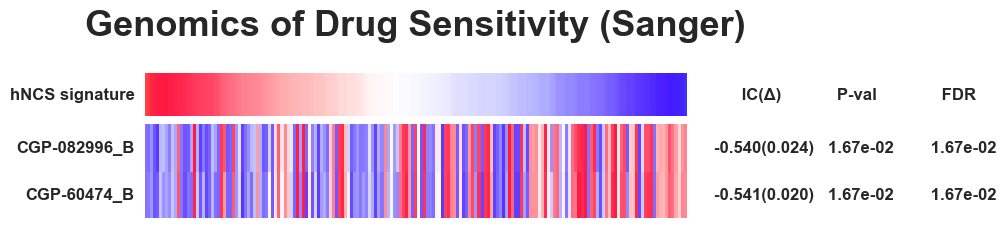

In [11]:
# Make Summary Panel
selected_sanger_drugs_df = ccal.association.make_association_panel(
                         sanger_hNSC_G3_150_UP,
                         sanger_drug_sensitivity_selected,
                         title='Genomics of Drug Sensitivity (Sanger)',
                         target_name='hNCS signature',
                         filepath_prefix=results)

<hr style="border: none; border-bottom: 1px solid #db0606;">
### 3.2 Compare CCLE hNSC signature to CTRP drug sensitivity 

In [12]:
indices = ['alvocidib']

In [13]:
results = join(DIR_RESULT, 'flavopiridol_panel')

In [14]:
ctrp_drug_sensitivity_selected = ctrp_drug_sensitivity.ix[indices, :]

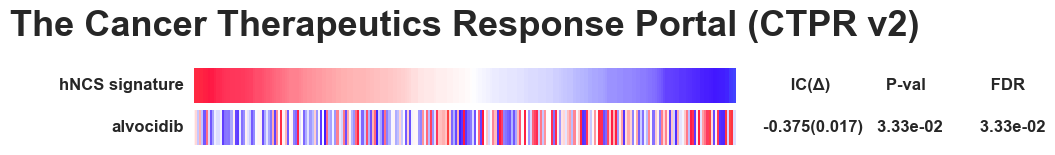

In [15]:
# Make Summary Panel
selected_ctrp_drugs_df = ccal.association.make_association_panel(
                       ccle_hNSC_G3_150_UP,
                       ctrp_drug_sensitivity_selected,
                       title='The Cancer Therapeutics Response Portal (CTPR v2)',
                       target_name='hNCS signature',
                       filepath_prefix=results)

<hr style="border: none; border-bottom: 1px solid #db0606;">
### 3.3 Compare CCLE hNSC signature to CCLE drug sensitivity 

In [16]:
indices = ['PD-0332991']

In [17]:
results = join(DIR_RESULT, 'palbociclib_panel')

In [18]:
ccle_drug_sensitivity_selected = ccle_drug_sensitivity.ix[indices, :]

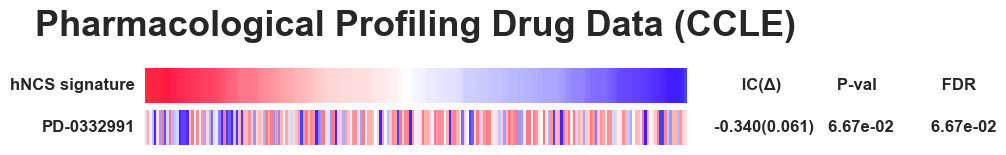

In [19]:
# Make Summary Panel
selected_ccle_drugs_df = ccal.association.make_association_panel(ccle_hNSC_G3_150_UP,
                                            ccle_drug_sensitivity_selected,
                                            title='Pharmacological Profiling Drug Data (CCLE)',
                                            target_name='hNCS signature',
                                            filepath_prefix=results)